# A Quick Preview of Two-Dimensional Statistical Methods

Until now, we have only looked at the interplay between multiple features of the Covid data set if we bin one of them and use that to partition the per-capita Covid data. Every summary statistic is applied to only one data feature. We refer to the number of features that are used in a statistical method as the *dimension* of the method. So, apart from the binning, we have limited ourselves to one-dimensional methods until now.

In this section, I will briefly introduce two-dimensional methods as a preview of techniques to be explored in more detail later. When extending our work to two dimensions, we can start by creating two-dimensional scatter plots. To do this, just plot one of our features against the other. Usually the feature that is used as the $x$ coordinate is the one that we intuitively think of as causative of the other feature. For example, it makes sense to think that the rate of Covid cases may increase or decrease with the urban index at the time that Covid became prevalent, but it makes little sense to think that the urban index at that time is affected by the rate of Covid cases.

In [1]:
# This is included here but hidden because a reader of the book can work straight
# through with the same variables, but for users downloading the notebooks, this
# separate Juypter notebook needs to recreate those variables from the CSV file

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/03-first-data/covid-merged.csv"
)
df.set_index("state", inplace=True)
df["cases_norm"] = df["cases"] / df["population"] * 1000
df["gdp_norm"] = df["gdp"] / df["population"] * 1000;

Let's begin with making a scatter plot of per-capita Covid rate versus per-capita GDP:

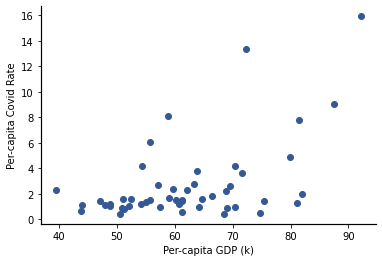

In [2]:
plt.scatter(df["gdp_norm"], df["cases_norm"])
plt.xlabel("Per-capita GDP (k)")
plt.ylabel("Per-capita Covid Rate");

This plot shows that many of the higher per-capita GDP results are associated with higher per-capita Covid rates, and many lower per-capita GDP results are associated with lower per-capita Covid rates. However, there are also some moderate GDP states that have very high Covid rates. 

Consider now the results comparing per-capita Covid rates to the urban index:

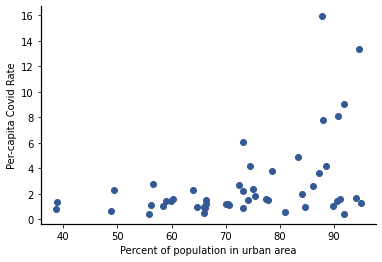

In [3]:
plt.scatter(df["urban"], df["cases_norm"])
plt.xlabel("Percent of population in urban area")
plt.ylabel("Per-capita Covid Rate");

The results in this plot show a much clearer relation between the urban index and the per-capita Covid rate. Thus, it is not surprising that partitioning the data based on the urban index produced statistically significant differences for the mean per-capita Covid rates.

When we have data with such an evident relation, it makes sense to fit the data with a curve. Let's try fitting this data with a line, which we will write as 

$$y=mx+b.$$

To determine what line makes sense, we will again need some measure of error, so let's use the total squared error again. Thus for each $x$ value (urban index), we will calculate a $y$ value using the formula for the line, and we will calculate the squared error to the true per-capita Covid rate. 

Without going into details, let's assume that we can find the slope $m$ independently of the $y$-intercept, $b$. By inspection of the figure, the slope should be somewhere between 0 and 15/100=0.15. Let's evaluate the squared error for several values in this range and determine which gives the best result:

best m = 0.03939393939393939 with error 427.69382326730664


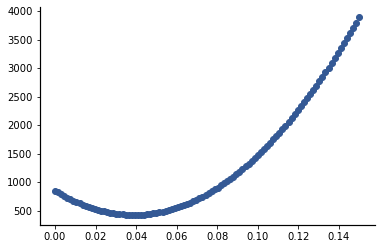

In [4]:
x = np.array(df["urban"])
true_y = np.array(df["cases_norm"])
ms = np.linspace(0, 0.15, 100)

errors = []
best_error = 1e12  # arbitrary big number
for m in ms:
    y = m * x
    error = np.sum((true_y - y) ** 2)  # We will see more efficient ways later
    errors += [error]
    if error < best_error:
        best_error = error
        best_m = m

plt.scatter(ms, errors)
print("best m =", best_m, "with error", best_error)

Now, let's plot the line with $b=0$ along with the data to get an idea of what the best value of $b$ might be.

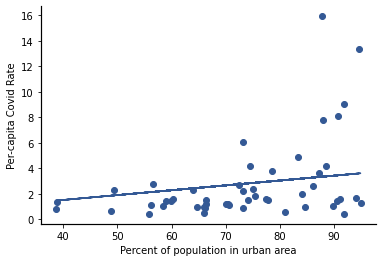

In [5]:
m = 0.038
plt.scatter(df["urban"], df["cases_norm"])
plt.xlabel("Percent of population in urban area")
plt.ylabel("Per-capita Covid Rate")

plt.plot(x, m * x)

Let's try values between -20 and 20:

In [6]:
m = 0.038

bs = np.linspace(-20, 20, 101)
best_error = 1e12  # arbitrary big number
for b in bs:
    y = m * x + b
    error = np.sum((true_y - y) ** 2)  # We will see more efficient ways later
    if error < best_error:
        best_error = error
        best_b = b

print("best b =", best_b, "with error", best_error)

best b = 0.0 with error 427.907974138381


The best $y$-intercept is zero, so the previous plot already shows the best linear fit. The positive slope indicates that the Covid rate increases with increasing Urban index. However, the rapid rise of the Covid cases with large values of the Urban index indicate that it may be better to fit the data with some other function. For instance, here is a quadratic curve that reduces the total squared error to 380.4:

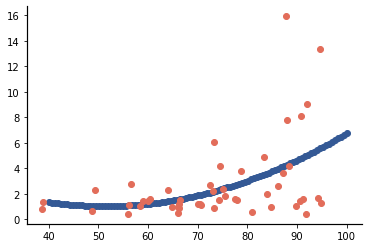

In [7]:
xp = np.linspace(40, 100, 101)

plt.scatter(xp, 7.46 - 0.25 * xp + 2.43e-3 * xp ** 2)
plt.scatter(x, true_y);

Other curves, such as higher dimensional polynomials or exponentials, can also be fit to the data. We will demonstrate how to perform all these types of curve fitting after we have introduced the linear algebra techniques needed.